<a href="https://colab.research.google.com/github/mrshahabian/MadeInIran/blob/master/Openpose_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Openpose API Tutorials

This notebook is a python-api tutorial for an open source project [CMU-Perceptual-Computing-Lab/openpose](https://github.com/CMU-Perceptual-Computing-Lab/openpose.git). Contributed by [Kasidit0052](https://github.com/Kasidit0052)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1o0s4qHjIej7j9I6mOAeuTbY_MiZXRqEQ?usp=sharing)

## Install Openpose and Pyopenpose python build

In [1]:
import os
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/CMU-Perceptual-Computing-Lab/openpose.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # see: https://github.com/CMU-Perceptual-Computing-Lab/openpose/issues/949
  # install new CMake becaue of CUDA10
  !wget -q https://cmake.org/files/v3.13/cmake-3.13.0-Linux-x86_64.tar.gz
  !tar xfz cmake-3.13.0-Linux-x86_64.tar.gz --strip-components=1 -C /usr/local
  # clone openpose
  !git clone -q --depth 1 $git_repo_url
  !sed -i 's/execute_process(COMMAND git checkout master WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/execute_process(COMMAND git checkout f019d0dfe86f49d1140961f8c7dec22130c83154 WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/g' openpose/CMakeLists.txt
  # install system dependencies
  !apt-get -qq install -y libatlas-base-dev libprotobuf-dev libleveldb-dev libsnappy-dev libhdf5-serial-dev protobuf-compiler libgflags-dev libgoogle-glog-dev liblmdb-dev opencl-headers ocl-icd-opencl-dev libviennacl-dev
  # install python dependencies
  !pip install -q youtube-dl
  # build openpose
  !cd openpose && rm -rf build || true && mkdir build && cd build && cmake -DBUILD_PYTHON=ON .. && make -j`nproc`
!mkdir openpose/videos 

Selecting previously unselected package libgflags2.2.
(Reading database ... 155013 files and directories currently installed.)
Preparing to unpack .../00-libgflags2.2_2.2.1-1_amd64.deb ...
Unpacking libgflags2.2 (2.2.1-1) ...
Selecting previously unselected package libgflags-dev.
Preparing to unpack .../01-libgflags-dev_2.2.1-1_amd64.deb ...
Unpacking libgflags-dev (2.2.1-1) ...
Selecting previously unselected package libgoogle-glog0v5.
Preparing to unpack .../02-libgoogle-glog0v5_0.3.5-1_amd64.deb ...
Unpacking libgoogle-glog0v5 (0.3.5-1) ...
Selecting previously unselected package libgoogle-glog-dev.
Preparing to unpack .../03-libgoogle-glog-dev_0.3.5-1_amd64.deb ...
Unpacking libgoogle-glog-dev (0.3.5-1) ...
Selecting previously unselected package libhdf5-serial-dev.
Preparing to unpack .../04-libhdf5-serial-dev_1.10.0-patch1+docs-4_all.deb ...
Unpacking libhdf5-serial-dev (1.10.0-patch1+docs-4) ...
Selecting previously unselected package libleveldb1v5:amd64.
Preparing to unpack ...

## Running Openpose binary example

In [2]:
# Define Openpose directory destination
OpenposeDir = '/content/openpose/'

# Upload Video Function
def upload_videos():
  from google.colab import files
  uploaded = files.upload()
  output = []
  for k, v in uploaded.items():
    open(k, 'wb').write(v)
    destination = os.path.join(OpenposeDir,'videos',k)
    os.rename(k,destination)
    output.append(destination)
  return output

videos_list = upload_videos()

Saving 1-falling-sofa.avi to 1-falling-sofa.avi
Saving sample_video.mp4 to sample_video.mp4


In [3]:
# Select Specific video from video lists
video_input = videos_list[0]

# move workspace and run binary file
!cd openpose && ./build/examples/openpose/openpose.bin --video $video_input --write_json ./output/ --display 0  --write_video ../openpose/videos/openpose.avi --hand --face

# convert the result into MP4
!ffmpeg -y -loglevel info -i openpose/videos/openpose.avi openpose/videos/output.mp4
!rm openpose/videos/openpose.avi

Starting OpenPose demo...
Configuring OpenPose...
Starting thread(s)...
Auto-detecting all available GPUs... Detected 1 GPU(s), using 1 of them starting at GPU 0.
OpenPose demo successfully finished. Total time: 55.643913 seconds.
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libs

In [4]:
def show_local_mp4_video(file_name, width=640, height=480):
  import io
  import base64
  from IPython.display import HTML
  video_encoded = base64.b64encode(io.open(file_name, 'rb').read())
  return HTML(data='''<video width="{0}" height="{1}" alt="test" controls>
                        <source src="data:video/mp4;base64,{2}" type="video/mp4" />
                      </video>'''.format(width, height, video_encoded.decode('ascii')))

show_local_mp4_video('openpose/videos/output.mp4', width=960, height=720)

## Preparing Pyopenpose workspace

In [5]:
# Define Openpose directory destination
OpenposeDir = '/content/openpose/'

# Import general libraries
import os 
import sys
import cv2
import warnings
from google.colab.patches import cv2_imshow
warnings.simplefilter(action='ignore', category=FutureWarning)

# Set Python Openpose Directory for python api (Important)
pyopenpose_dir = os.path.join(OpenposeDir,'build','python') # ex: '/content/openpose/build/python'
if pyopenpose_dir not in sys.path:
    sys.path.append(pyopenpose_dir)
from openpose import pyopenpose as op

## Tutorials 1 : Whole body Keypoints from image

### **Openpose Body Detector**

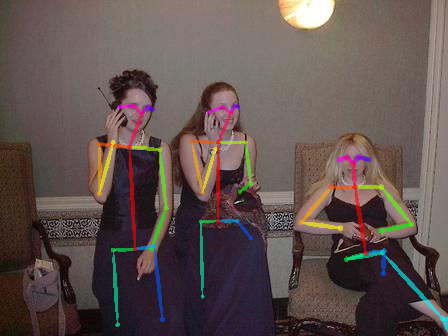

In [6]:
# Custom Params (refer to openpose/include/openpose/flags.hpp for more parameters)
params = dict()
params["model_folder"] = os.path.join(OpenposeDir,'models')  # path to model folder ex: '/content/openpose/models'

# Starting OpenPose
opWrapper = op.WrapperPython()
opWrapper.configure(params)
opWrapper.start()

# Process Image
datum = op.Datum()
input_image = cv2.imread("/content/openpose/examples/media/COCO_val2014_000000000536.jpg") # Change Image Path Here
datum.cvInputData = input_image
opWrapper.emplaceAndPop(op.VectorDatum([datum]))
network_output = datum.poseKeypoints

# Display Image
cv2_imshow(datum.cvOutputData)

**Inspecting Openpose output keypoints ( the index can be referenced from the picture below )**

the output are x--coordinate, y--coordinate and confidence respectively

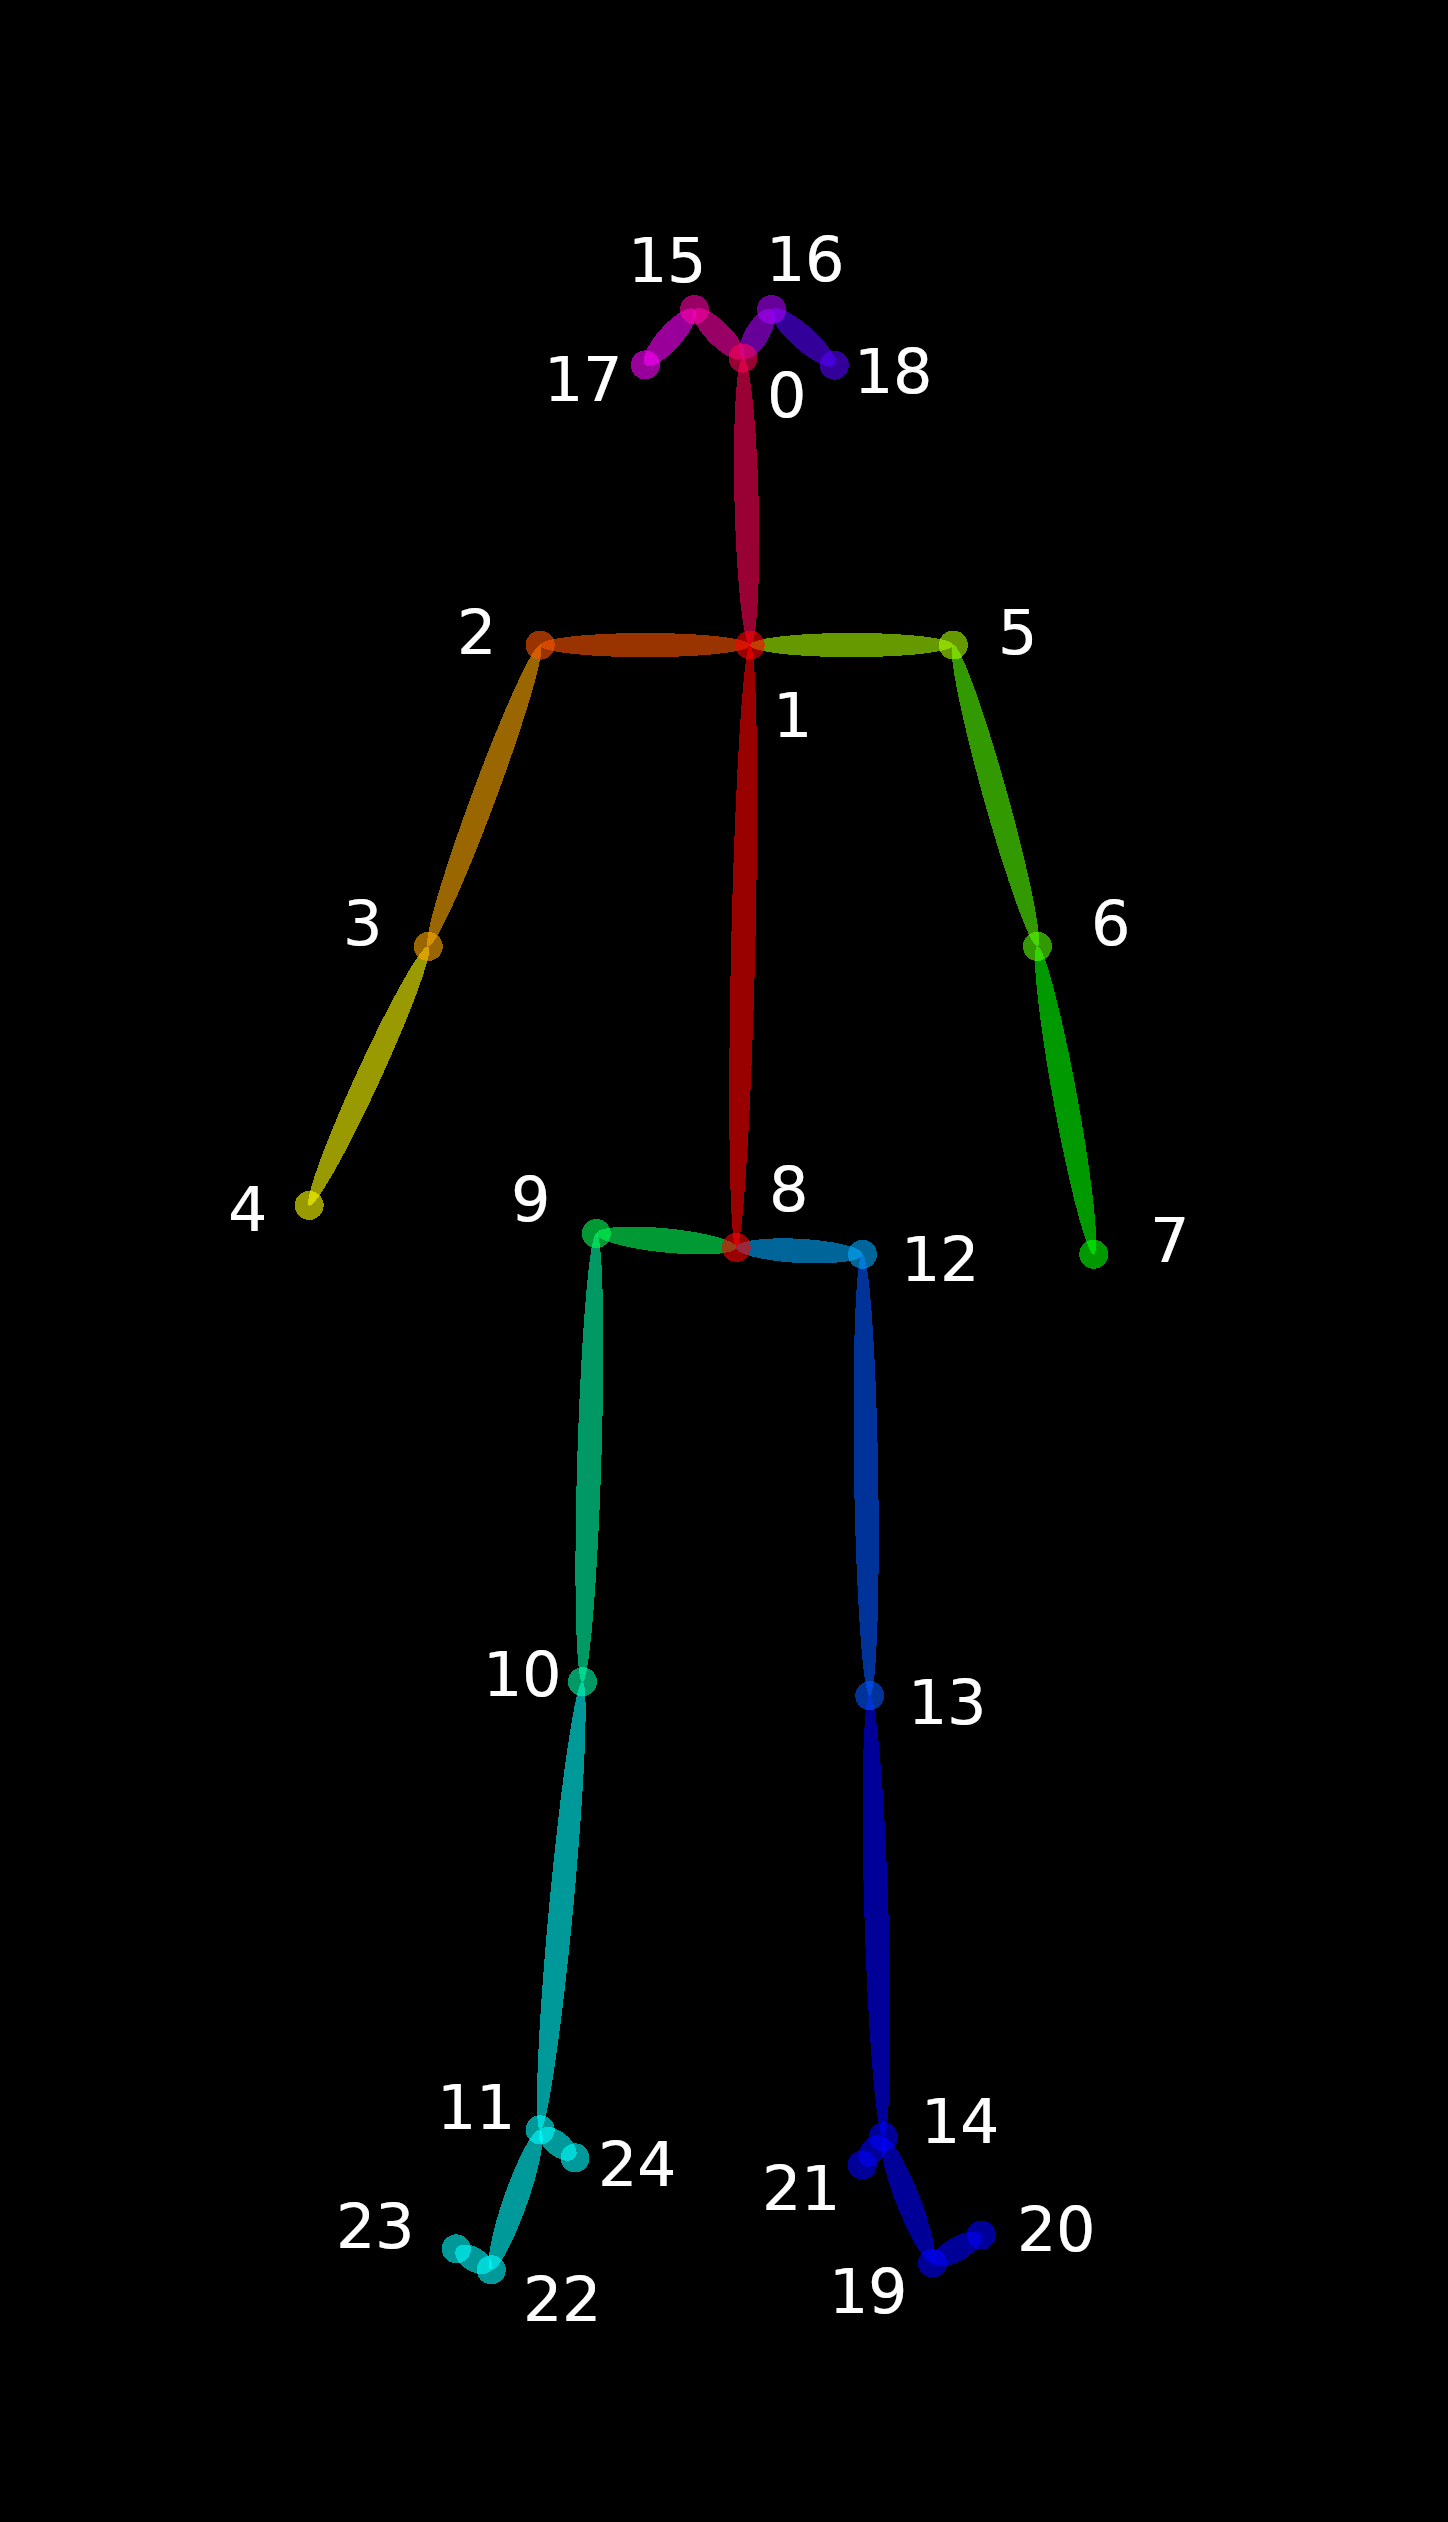

In [7]:
network_output

array([[[3.52633331e+02, 1.62882507e+02, 8.77677321e-01],
        [3.54500397e+02, 1.86605347e+02, 8.60389709e-01],
        [3.30738739e+02, 1.86633667e+02, 7.85359383e-01],
        [3.00628723e+02, 2.22165100e+02, 8.52995515e-01],
        [3.39890717e+02, 2.27632980e+02, 8.27674747e-01],
        [3.80916412e+02, 1.86563004e+02, 7.90244222e-01],
        [4.11019745e+02, 2.24010513e+02, 8.68296444e-01],
        [3.80912445e+02, 2.30357773e+02, 8.27933192e-01],
        [3.65402710e+02, 2.53203873e+02, 5.52374661e-01],
        [3.46234558e+02, 2.58652618e+02, 5.81862092e-01],
        [3.81814545e+02, 2.52282242e+02, 6.01171374e-01],
        [4.42074493e+02, 3.17957001e+02, 6.21207595e-01],
        [3.83644257e+02, 2.50444672e+02, 5.42252302e-01],
        [3.82719818e+02, 2.73249725e+02, 5.43371558e-01],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [3.46275116e+02, 1.56535202e+02, 9.36202168e-01],
        [3.59006226e+02, 1.56525345e+02, 8.94469202e-01],
        [3.389

**Visualizing array data into an understandable format**

Normally, openpose use Body25 Format in default configurations

In [8]:
# Import general libraries
import copy
import pandas as pd
from itertools import zip_longest

# Function for grouping list items 
def grouper(iterable, n, fillvalue=None):
    "Collect data into fixed-length chunks or blocks"
    args = [iter(iterable)] * n
    return list(zip_longest(*args, fillvalue=fillvalue))

# Get body parts and pose pairs from openpose library (refer to openpose/src/openpose/pose/poseParameters.cpp for more parameters)
BODY_PARTS = op.getPoseBodyPartMapping(op.BODY_25)
POSE_PAIRS = op.getPosePartPairs(op.BODY_25)
POSE_PAIRS = grouper(POSE_PAIRS, 2, None)

# Unwrapping Person Keypoints from Openpose Network Output
index_names = copy.deepcopy(BODY_PARTS)
index_names.pop(25)
for human in network_output:
    output_sub_arr = {}
    for i in range(len(human)):
        output_sub_arr[BODY_PARTS[i]]= [int(human[i][0]),int(human[i][1]),human[i][2]]
    print("\n   Person Detected")
    print(pd.DataFrame(output_sub_arr.values(), columns=['x','y','confidences'], index=list(index_names.values())))


   Person Detected
             x    y  confidences
Nose       352  162     0.877677
Neck       354  186     0.860390
RShoulder  330  186     0.785359
RElbow     300  222     0.852996
RWrist     339  227     0.827675
LShoulder  380  186     0.790244
LElbow     411  224     0.868296
LWrist     380  230     0.827933
MidHip     365  253     0.552375
RHip       346  258     0.581862
RKnee      381  252     0.601171
RAnkle     442  317     0.621208
LHip       383  250     0.542252
LKnee      382  273     0.543372
LAnkle       0    0     0.000000
REye       346  156     0.936202
LEye       359  156     0.894469
REar       338  159     0.700735
LEar       368  159     0.772415
LBigToe      0    0     0.000000
LSmallToe    0    0     0.000000
LHeel        0    0     0.000000
RBigToe    450  333     0.112443
RSmallToe    0    0     0.000000
RHeel      450  319     0.366867

   Person Detected
             x    y  confidences
Nose       230  112     0.952630
Neck       217  141     0.843662
RSh



```
# This is formatted as code
```

## Tutorials 2 : Face Keypoints from image

### **OpenCV Face detector (Faster but Accuracy Might be lower than Openpose Face Detector)**

Could be useful when we want only face keypoints 

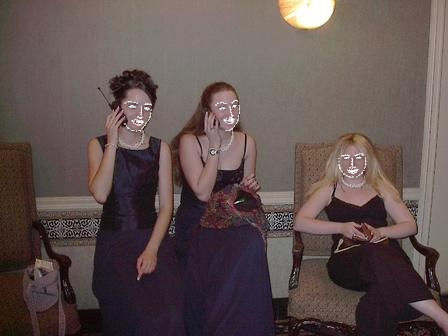

In [13]:
# Custom Params (refer to openpose/include/openpose/flags.hpp for more parameters)
params = dict()
params["model_folder"] = os.path.join(OpenposeDir,'models')  # path to model folder ex: '/content/openpose/models'
params["hand"] = False              # Disable hand keypoint detection
params["face"] = True               # Enable face keypoint detection
params["face_detector"] = 1         # OpenCV Face rectangle detector 
params["body"] = 0                  # Enable/Disable Body Keypoint detection

# Starting OpenPose
opWrapper = op.WrapperPython()
opWrapper.configure(params)
opWrapper.start()

# Process Image
datum = op.Datum()
input_image = cv2.imread("/content/openpose/examples/media/COCO_val2014_000000000536.jpg") # Change Image Path Here
datum.cvInputData = input_image
opWrapper.emplaceAndPop(op.VectorDatum([datum]))
network_output = datum.faceKeypoints

# Resize Image (Optional)
img = datum.cvOutputData
scale_percent = 100 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
output_image = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

# Display Image
cv2_imshow(output_image)

**Inspecting Openpose output keypoints ( the index can be referenced from the picture below )**

the output are x--coordinate, y--coordinate and confidence respectively

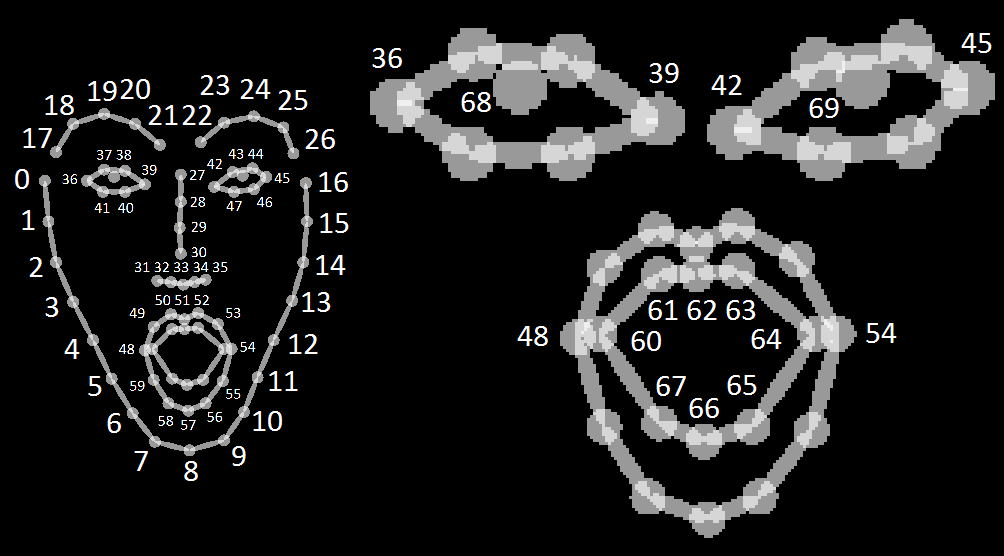




In [14]:
print("Face Output Dimension:"+ str(network_output.shape))

Face Output Dimension:(3, 70, 3)


### **Openpose Face detector**

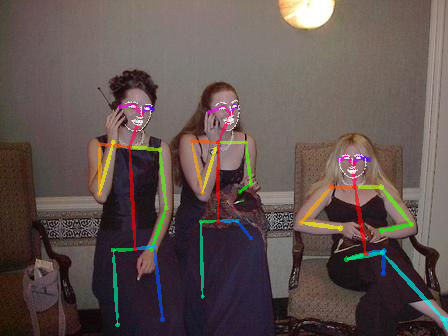

In [15]:
# Custom Params (refer to openpose/include/openpose/flags.hpp for more parameters)
params = dict()
params["model_folder"] = os.path.join(OpenposeDir,'models')  # path to model folder ex: '/content/openpose/models'
params["hand"] = False              # Disable hand keypoint detection
params["face"] = True               # Enable face keypoint detection
params["face_detector"] = 0         # Openpose Face rectangle detector 
params["body"] = 1                  # Enable/Disable Body Keypoint detection

# Starting OpenPose
opWrapper = op.WrapperPython()
opWrapper.configure(params)
opWrapper.start()

# Process Image
datum = op.Datum()
input_image = cv2.imread("/content/openpose/examples/media/COCO_val2014_000000000536.jpg") # Change Image Path Here
datum.cvInputData = input_image
opWrapper.emplaceAndPop(op.VectorDatum([datum]))
face_network_output = datum.faceKeypoints
pose_network_output = datum.poseKeypoints

# Resize Image (Optional)
img = datum.cvOutputData
scale_percent = 100 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
output_image = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

# Display Image
cv2_imshow(output_image)

**Inspecting Openpose output keypoints**

the output are x--coordinate, y--coordinate and confidence respectively

In [16]:
print("Face Output Dimension:"+ str(face_network_output.shape))
print("Pose Output Dimension:"+ str(pose_network_output.shape))

Face Output Dimension:(3, 70, 3)
Pose Output Dimension:(3, 25, 3)


## Tutorials 3 : Hand Keypoints from image

### **Openpose Hand Detector**

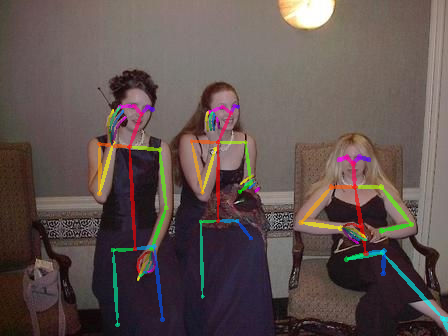

In [17]:
# Custom Params (refer to openpose/include/openpose/flags.hpp for more parameters)
params = dict()
params["model_folder"] = os.path.join(OpenposeDir,'models')  # path to model folder ex: '/content/openpose/models'
params["face"] = False              # Disable face keypoint detection
params["hand"] = True               # Enables hand keypoint detection
params["hand_detector"] = 0         # Openpose hand rectangle detector 
params["body"] = 1                  # Enable/Disable Body Keypoint detection

# Starting OpenPose
opWrapper = op.WrapperPython()
opWrapper.configure(params)
opWrapper.start()

# Process Image
datum = op.Datum()
input_image = cv2.imread("/content/openpose/examples/media/COCO_val2014_000000000536.jpg") # Change Image Path Here
datum.cvInputData = input_image
opWrapper.emplaceAndPop(op.VectorDatum([datum]))
hand_network_output = datum.handKeypoints
pose_network_output = datum.poseKeypoints

# Resize Image (Optional)
img = datum.cvOutputData
scale_percent = 100 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
output_image = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

# Display Image
cv2_imshow(output_image)

**Inspecting Openpose output keypoints ( the index can be referenced from the picture below )**

the output are x--coordinate, y--coordinate and confidence respectively

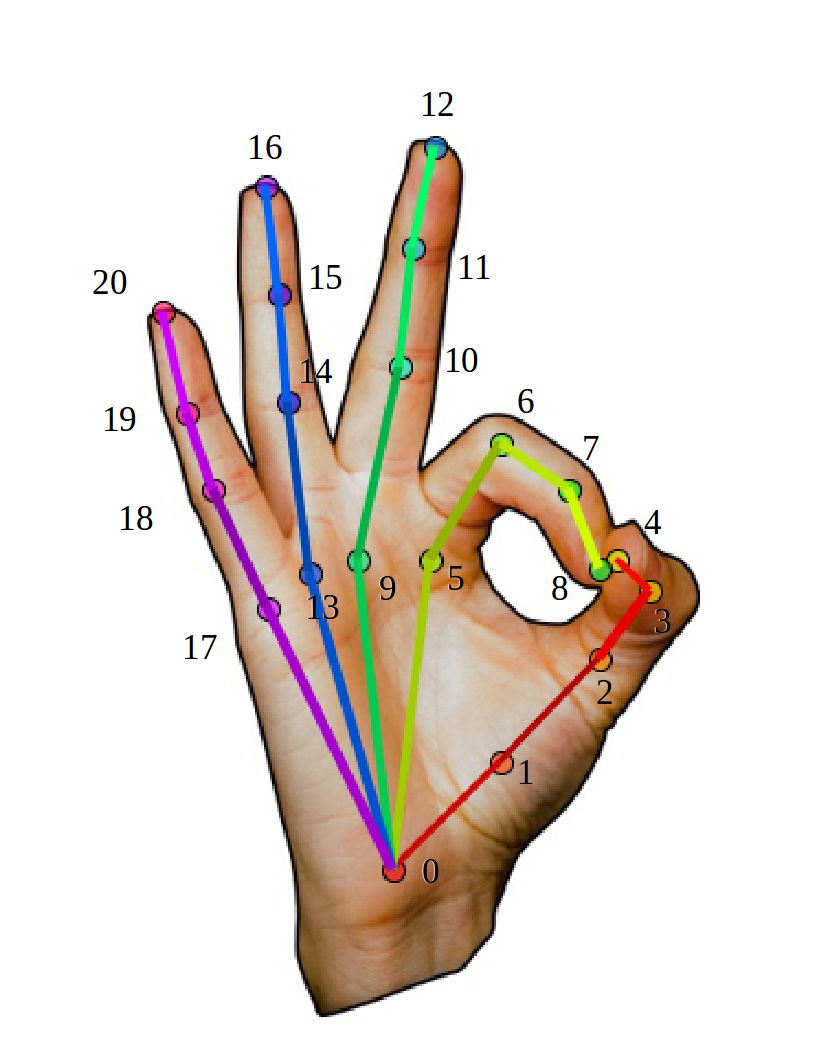

In [18]:
print("Left Hand Output Dimension:"+ str(hand_network_output[0].shape) + ", Right Hand Output Dimension:"+ str(hand_network_output[1].shape))
print("Pose Output Dimension:"+ str(pose_network_output.shape))

Left Hand Output Dimension:(3, 21, 3), Right Hand Output Dimension:(3, 21, 3)
Pose Output Dimension:(3, 25, 3)


In [19]:
# Finally, Reset Face Detector and Hand Detector params
# Custom Params (refer to openpose/include/openpose/flags.hpp for more parameters)
params = dict()
params["model_folder"] = os.path.join(OpenposeDir,'models')  # path to model folder ex: '/content/openpose/models'
params["body"] = 1             # Enable Full Openpose Network
params["face"] = False         # Disable face keypoint detection
params["hand"] = False         # Enables hand keypoint detection

# Starting OpenPose
opWrapper = op.WrapperPython()
opWrapper.configure(params)
opWrapper.start()

## Tutorials 4 : Heatmaps from Image and Keypoints from Heatmaps

### **Visualization Function**

In [20]:
from PIL import Image
from math import ceil

def createImageGrid(images, scale=0.5, rows=1):
   w,h = images[0].size
   w = int(w*scale)
   h = int(h*scale)
   height = rows*h
   cols = ceil(len(images) / rows)
   width = cols*w
   canvas = Image.new('RGBA', (width,height), 'white')
   for i,img in enumerate(images):
     img = img.resize((w,h), Image.ANTIALIAS)
     canvas.paste(img, (w*(i % cols), h*(i // cols))) 
   return canvas

### **Extract Heatmaps from images**

**the Result of heatmaps consists of Body Parts and Parts affinity Fields (PAF)**

For the heat maps storing format, instead of saving body parts and affinity field separately, the library concatenates them into a huge matrix which have depth size 78 (25 body parts + background + 2 x 26 PAFs) for body25 format




Heatmaps shape:(78, 368, 496)


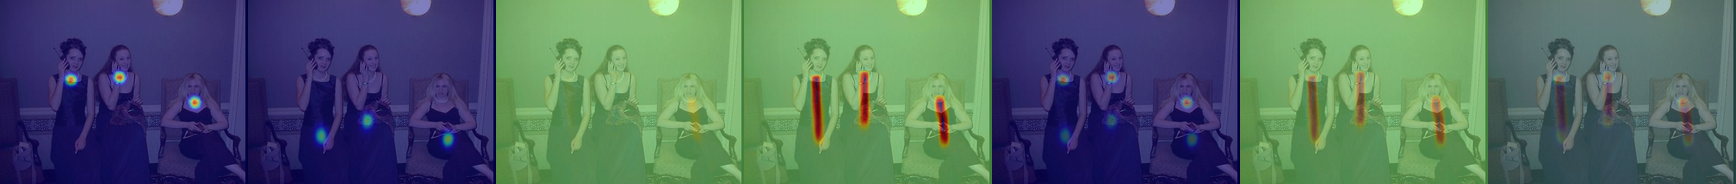

In [ ]:
# Custom Params (refer to openpose/include/openpose/flags.hpp for more parameters)
params = dict()
params["model_folder"] = os.path.join(OpenposeDir,'models')  # path to model folder ex: '/content/openpose/models'
params["heatmaps_add_parts"] = True # add parts to output heatmaps
params["heatmaps_add_bkg"] = True   # add background to output heatmaps
params["heatmaps_add_PAFs"] = True  # add PAFs to output heatmaps
params["heatmaps_scale"] = 2        # Convert Heatmaps into uint8 type

# Starting OpenPose
opWrapper = op.WrapperPython()
opWrapper.configure(params)
opWrapper.start()

# Process Image
datum = op.Datum()
input_image = cv2.imread("/content/openpose/examples/media/COCO_val2014_000000000536.jpg") # Change Image Path Here
datum.cvInputData = input_image
opWrapper.emplaceAndPop(op.VectorDatum([datum]))

# Get Input Image from openpose network
outputImageF = (datum.inputNetData[0].copy())[0,:,:,:] + 0.5
outputImageF = cv2.merge([outputImageF[0,:,:], outputImageF[1,:,:], outputImageF[2,:,:]])
outputImageF = (outputImageF*255.).astype(dtype='uint8')

# Get Heatmap output
heatmaps = datum.poseHeatMaps.copy()
poseHeatMaps = datum.poseHeatMaps.copy()
heatmaps = (heatmaps).astype(dtype='uint8')
print("Heatmaps shape:"+str(poseHeatMaps.shape))

# For Body25 Format, the result heatmaps consists of :
# Body_Parts = [0,24]
# Background = [25]
# Part_Affinity_field = [26,77]
POSE_PAIR = [1,8]                  # Specific POSE_PAIR 
POSE_MAP_INDEX  = [26,27]          # Specific POSE_MAP_INDEX

# Looping through POSE_PAIR
part_heatmaps = []
for x in POSE_PAIR:
    heatmap = heatmaps[x, :, :].copy()
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    combined = cv2.addWeighted(outputImageF, 0.5, heatmap, 0.5, 0)
    part_heatmaps.append(Image.fromarray(cv2.cvtColor(combined, cv2.COLOR_BGR2RGB)))

# Looping through POSE_MAP_INDEX
paf_heatmaps = []
for y in POSE_MAP_INDEX:
    heatmap = heatmaps[y, :, :].copy()
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    combined = cv2.addWeighted(outputImageF, 0.5, heatmap, 0.5, 0)
    paf_heatmaps.append(Image.fromarray(cv2.cvtColor(combined, cv2.COLOR_BGR2RGB)))

# create a combination of part_heatmaps and paf_heatmaps
part_merged_heatmap = Image.blend(part_heatmaps[0], part_heatmaps[1], 0.5)
paf_merged_heatmap  = Image.blend( paf_heatmaps[0],  paf_heatmaps[1], 0.5)
tot_heatmap         = Image.blend( part_merged_heatmap, paf_merged_heatmap, 0.5)

# concat all heatmap for visualization
total_heatmaps = part_heatmaps + paf_heatmaps + [ part_merged_heatmap, paf_merged_heatmap, tot_heatmap]

# Display Image
createImageGrid(total_heatmaps, scale=0.5, rows=1)

### **Extract Keypoints from Heatmaps**

**Get Heatmap with the specific configurations**

In [ ]:
# Custom Params (refer to openpose/include/openpose/flags.hpp for more parameters)
params = dict()
params["model_folder"] = os.path.join(OpenposeDir,'models')  # path to model folder ex: '/content/openpose/models'
params["heatmaps_add_parts"] = True # add parts to output heatmaps
params["heatmaps_add_bkg"] = True   # add background to output heatmaps
params["heatmaps_add_PAFs"] = True  # add PAFs to output heatmaps
params["heatmaps_scale"] = 3        # Without scaling the heatmap pixels
params["upsampling_ratio"] = 1      # upsampling ratio configs from openpose
params["body"] = 1                  # enable body detection

# Starting OpenPose
opWrapper = op.WrapperPython()
opWrapper.configure(params)
opWrapper.start()

# Process Image
datum = op.Datum()
input_image = cv2.imread("/content/openpose/examples/media/COCO_val2014_000000000536.jpg") # Change Image Path Here
datum.cvInputData = input_image
opWrapper.emplaceAndPop(op.VectorDatum([datum]))
poseHeatMaps = datum.poseHeatMaps.copy()
opWrapper.stop()
print("Heatmaps shape:"+str(poseHeatMaps.shape))

Heatmaps shape:(78, 46, 62)


**Keypoints Detection from the heatmaps**

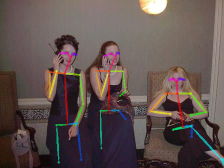

In [ ]:
# Custom Params (refer to openpose/include/openpose/flags.hpp for more parameters)
params = dict()
params["model_folder"] = os.path.join(OpenposeDir,'models')  # path to model folder ex: '/content/openpose/models'
params["body"] = 2                  # disable its internal body pose estimation network but still running the greedy association parsing algorithm
params["upsampling_ratio"] = 0      # unset upsampling ratio 

# Starting OpenPose
opWrapper = op.WrapperPython()
opWrapper.configure(params)
opWrapper.start()

# Process Image
datum = op.Datum()
datum.cvInputData   =  input_image
datum.poseNetOutput = poseHeatMaps
opWrapper.emplaceAndPop(op.VectorDatum([datum]))
network_output = datum.poseKeypoints

# Resize Image (Optional)
img = datum.cvOutputData
scale_percent = 50 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
output_image = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

# Display Image
cv2_imshow(output_image)

In [ ]:
# Re-enable Openpose network and Reset Heatmap Parameters
# Custom Params (refer to openpose/include/openpose/flags.hpp for more parameters)
params = dict()
params["model_folder"] = os.path.join(OpenposeDir,'models')  # path to model folder ex: '/content/openpose/models'
params["body"] = 1                   # Enable Full Openpose Network
params["heatmaps_add_parts"] = False # add parts to output heatmaps
params["heatmaps_add_bkg"]   = False # add background to output heatmaps
params["heatmaps_add_PAFs"]  = False # add PAFs to output heatmaps
params["heatmaps_scale"]     = 2     # heatmaps scale configs from openpose

# Starting OpenPose
opWrapper = op.WrapperPython()
opWrapper.configure(params)
opWrapper.start()